In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the file
df = pd.read_csv('C:\sandeep\Python\Case Study\Lead Scoring Assignment\Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Data Cleaning

In [4]:
#Finiding % of Null values for each of the columns
round(df.isnull().sum()/df.isnull().count()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [5]:
#Removing all columns, which has null values greater than 45%
df = df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',\
             'Asymmetrique Profile Score'],axis=1)

In [6]:
#Removing all columns, which has only single value or majority are single values
df = df.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',\
             'Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course'],axis=1)

In [7]:
#Converting 'Select' value to null value
df['Specialization'] = df['Specialization'].replace('Select',np.nan)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select',np.nan)
df['Lead Profile'] = df['Lead Profile'].replace('Select',np.nan)
df['City'] = df['City'].replace('Select',np.nan)

In [8]:
round(df.isnull().sum()/df.isnull().count()*100,2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Tags                                      36.29
Lead Profile                              74.19
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [9]:
#Removing values with high null value (Greater than 30%). Specialization and Tags features are not removed expecting some insights 
df = df.drop(['How did you hear about X Education','Lead Profile','City'],axis=1)

In [10]:
#Replacing blank values in categorical columns with value of maximum occurance. 
# If there is no single value with majority occurance, replacing with Other
df['Country'].fillna('India',inplace=True)
df['What is your current occupation'].fillna('Unemployed',inplace=True)
df['Lead Source'].fillna('Other',inplace=True)
df['Last Activity'].fillna('Other',inplace=True)
df['Specialization'].fillna('Other',inplace=True)
df['Tags'].fillna('Other',inplace=True)

In [11]:
#Replacing blank values in numerical columns with median value 
df['TotalVisits'].fillna((df['TotalVisits'].median()), inplace=True)
df['Page Views Per Visit'].fillna((df['Page Views Per Visit'].median()), inplace=True)

In [12]:
round(df.isnull().sum()/df.isnull().count()*100,2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Country                                   9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Tags                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable

In [14]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Other,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Other,Unemployed,Will revert after reading the email,No,Modified


In [15]:
#Correction in spellings and renaming

df["Lead Source"]= df["Lead Source"].replace("google", "Google")
df["Country"]= df["Country"].replace("unknown", "India") #replaced with majority occurance


In [16]:
## Preparing the data for modelling

In [17]:
# A deep dive into Tags feature reveals few categories which can be combinmed as one for reducing dimensionality

# The cources are meant for industry professionals and hence Tags like' Diploma holder (Not Eligible)', 'Graduation in progress'
# 'Recognition issue (DEC approval)', 'University not recognized', can all be treated as not eligible. Combining these categories

df_mod = df

df_mod["Tags"]= df["Tags"].replace("Diploma holder (Not Eligible)", "Not Eligible")
df_mod["Tags"]= df_mod["Tags"].replace("Graduation in progress", "Not Eligible")
df_mod["Tags"]= df_mod["Tags"].replace("Recognition issue (DEC approval)", "Not Eligible")
df_mod["Tags"]= df_mod["Tags"].replace("University not recognized", "Not Eligible")

# similarly ' invalid number', 'number not provided', 'switched off', 'wrong number given', practically have the same effect

df_mod["Tags"]= df_mod["Tags"].replace("invalid number", "No number")
df_mod["Tags"]= df_mod["Tags"].replace("number not provided", "No number")
df_mod["Tags"]= df_mod["Tags"].replace("switched off", "No number")
df_mod["Tags"]= df_mod["Tags"].replace("wrong number given", "No number")


df_mod.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Other,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Other,Unemployed,Will revert after reading the email,No,Modified


In [18]:
# Converting some binary variables (Yes/No) to 0/1

column =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_mod[column] = df_mod[column].apply(binary_map)

df_mod.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Other,Unemployed,Interested in other courses,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,Ringing,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Other,Unemployed,Will revert after reading the email,0,Modified


In [19]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_mod[['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization','What is your current occupation','Tags','Last Notable Activity']])

dummy1.head()


,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
# consolidating the  results with  the master dataframe
df_mod = pd.concat([df, dummy1], axis=1)
df_mod.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0


In [21]:
# dummies are created for the below variables and hence dropping them
df_mod = df_mod.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization','What is your current occupation','Tags','Last Notable Activity'], 1)

In [22]:
df_mod.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
df_mod.to_csv('C:\sandeep\Python\Case Study\Lead Scoring Assignment\Leads_clean2.csv')

In [24]:
#Checking for outliers in continous variables
num_df_mod = df_mod[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df_mod.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [25]:
#Dropping rows with total visits and Page Views Per visit above 50. 
# Higher values in Total time spent column is not removed since more time spent is expected to have a higher conversion rate 
# and maximum value of 2272 is not widely variying from 99th percentile of 1840

df_mod1 = df_mod[df_mod['TotalVisits']  <= 50]      



In [26]:
#Checking for outliers in continous variables
num_df_mod = df_mod1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df_mod.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9234.000000,9234.000000,9234.000000
mean,3.366147,487.606130,2.349417
std,3.477567,548.047472,2.071242
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,9.000000,1562.000000,6.000000
99%,16.670000,1840.670000,9.000000


In [27]:
# Dropping propsect id feature since both prospect id and Lead number are unique numbers indicating the same target
df_mod1.drop(["Prospect ID"], axis = 1, inplace = True) 

C:\Users\Rohini\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
df_mod1.shape


(9234, 149)

In [29]:
df_mod1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,...,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000,9234.000000
mean,617188.497076,0.385532,3.366147,487.606130,2.349417,0.312432,0.387698,0.528482,0.077756,0.005956,...,0.000108,0.001516,0.368854,0.019818,0.034005,0.000108,0.235109,0.003465,0.005090,0.000108
std,23410.526190,0.486747,3.477567,548.047472,2.071242,0.463510,0.487251,0.499215,0.267802,0.076951,...,0.010407,0.038910,0.482520,0.139382,0.181251,0.010407,0.424090,0.058769,0.071165,0.010407
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596479.250000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615484.500000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.750000,1.000000,5.000000,936.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,43.000000,2272.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
##Test-Train Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Putting feature variable to X
X = df_mod1.drop(['Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
# Putting response variable to y
y = df_mod1['Converted']

y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
## Feature Standardisation

In [36]:
# Normalising continuous features
df = X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [37]:
normalized_df=(df-df.mean())/df.std()
X_train = X_train.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)
X_train = pd.concat([X_train,normalized_df],axis=1)
X_train.head()

,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7417,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,-0.390568,2.028644,-0.166062
1032,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0.768137,1.620308,1.773277
6538,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,-0.969920,-0.889862,-1.135732
7284,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.188785,-0.700277,-0.166062
3194,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.969920,-0.889862,-1.135732


In [38]:
# Checking the Conversion Rate
Conversion = (sum(df_mod1['Converted'])/len(df_mod1['Converted'].index))*100
Conversion

38.55317305609704

In [39]:
## Looking at correlations

In [40]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

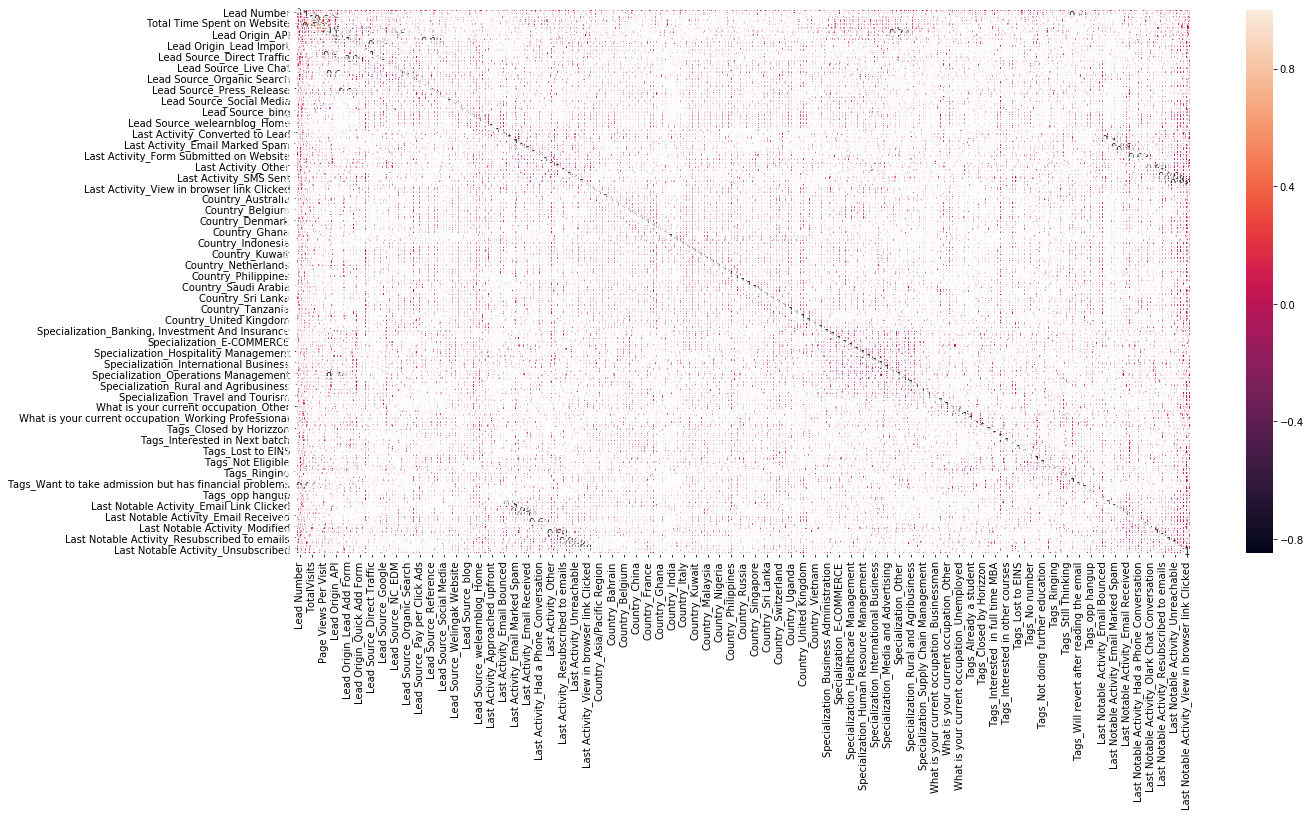

In [41]:
# Checking the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_mod1.corr(),annot = True)
plt.show()

In [42]:
## Feature Selection Using RFE

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [45]:
col = X_train.columns[rfe.support_]

In [46]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True, False, False, False,  True,
       False,  True,

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('A free copy of Mastering The Interview', False, 68),
 ('Lead Origin_API', False, 50),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Origin_Lead Import', False, 72),
 ('Lead Origin_Quick Add Form', False, 129),
 ('Lead Source_Click2call', False, 47),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 118),
 ('Lead Source_NC_EDM', False, 27),
 ('Lead Source_Olark Chat', False, 35),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Other', False, 36),
 ('Lead Source_Pay per Click Ads', False, 116),
 ('Lead Source_Press_Release', False, 121),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', False, 86),
 ('Lead Source_WeLearn', False, 113),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 85),
 ('Lead Source_blog', False, 44),
 ('Lead Sou

In [48]:
# Assessing the model with StatsModels

In [49]:
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1442.1
Date:                Mon, 26 Aug 2019   Deviance:                       2884.1
Time:                        22:16:20   Pearson chi2:                 1.28e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2158      0.073    -16.668      0.000      -1.359      -1.073
Lead Source_Welingak Website                      5.4670      1.030      5.310      0.000       3.449       7.485
Last Activity_SMS Sent                            2.0897      0.107     19.531      0.000       1.880       2.299
Tags_Already a student                           -3.3392      0.713     -4.681      0.000      -4.737      -1.941
Tags_Closed by Horizzon                           7.3050      0.720     10.150      0.000       5.894       8.716
Tags_Interested  in full time MBA                -1.5733      0.596     -2.638      0.008      -2.742      -0.404
Tags_Interested in other courses                 -1.7576      0.355     -4.945      0.000      -2.454      -1.061
Tags_Lost to EINS                                 6.0652      0.599     10.132      0.000       4.892       7.238
Tags_No number                                   -4.1264      0.514     -8.024      0.000      -5.134      -3.118
Tags_Not Eligible                                -1.4288      0.476     -3.002      0.003      -2.362      -0.496
Tags_Not doing further education                 -2.8302      1.023     -2.766      0.006      -4.835      -0.825
Tags_Ringing                                     -3.4497      0.224    -15.368      0.000      -3.890      -3.010
Tags_Will revert after reading the email          4.6514      0.169     27.585      0.000       4.321       4.982
Tags_opp hangup                                  -2.9259      1.053     -2.778      0.005      -4.990      -0.862
Last Notable Activity_Modified                   -1.8270      0.118    -15.471      0.000      -2.058      -1.596
Last Notable Activity_Olark Chat Conversation    -1.4551      0.401     -3.633      0.000      -2.240      -0.670
=================================================================================================================
"""

In [50]:
#Calculating vif for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.07
0,Lead Source_Welingak Website,1.03
6,Tags_Lost to EINS,1.03
8,Tags_Not Eligible,1.03
9,Tags_Not doing further education,1.03
4,Tags_Interested in full time MBA,1.02
14,Last Notable Activity_Olark Chat Conversation,1.01
12,Tags_opp hangup,1.00
5,Tags_Interested in other courses,0.33
2,Tags_Already a student,0.23


In [51]:
# For all 15 variables selected by RFE, both p values and VIF looks within the reasonable threshold

### Making Predictions

In [52]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_1)
y_train_pred[:10]

7417    0.070712
1032    0.705554
6538    0.998240
7284    0.009327
3194    0.968800
712     0.001513
3947    0.004763
3436    0.228682
6610    0.228682
8013    0.045533
dtype: float64

In [53]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07071155, 0.70555372, 0.9982403 , 0.00932706, 0.96879991,
       0.00151258, 0.00476269, 0.22868209, 0.22868209, 0.04553252])

#### Creating a dataframe with the actual Converstion values and the predicted probabilities

In [54]:
y_train_pred_final = pd.DataFrame({'Converstion':y_train.values, 'Converstion_prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converstion,Converstion_prob
0,0,0.070712
1,1,0.705554
2,1,0.998240
3,0,0.009327
4,1,0.968800


In [55]:
y_train_pred_final['predicted'] = y_train_pred_final.Converstion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converstion,Converstion_prob,predicted
0,0,0.070712,0
1,1,0.705554,1
2,1,0.998240,1
3,0,0.009327,0
4,1,0.968800,1


In [56]:
from sklearn import metrics

In [57]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converstion, y_train_pred_final.predicted )
print(confusion)

[[3815  163]
 [ 333 2152]]


In [58]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converstion, y_train_pred_final.predicted))

0.9232554541234721


In [59]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [60]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8659959758551308

In [61]:
# Let us calculate specificity
TN / float(TN+FP)

0.9590246354952238

In [62]:
# Calculate false postive rate - predicting Conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04097536450477627


In [63]:
# positive predictive value 
print (TP / float(TP+FP))

0.9295896328293737


In [64]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9197203471552555


In [65]:
from sklearn.metrics import precision_score, recall_score

In [66]:
precision_score(y_train_pred_final.Converstion, y_train_pred_final.predicted)

0.9295896328293737

In [67]:
recall_score(y_train_pred_final.Converstion, y_train_pred_final.predicted)

0.8659959758551308

### ROC Curve

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converstion, y_train_pred_final.predicted)

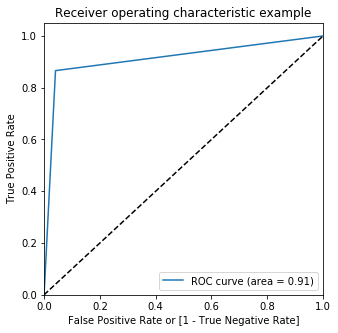

In [70]:
draw_roc(y_train_pred_final.Converstion, y_train_pred_final.predicted)

### Making Predictions on Test Data Set

In [71]:
# Normalising continuous features
df1 = X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [72]:
normalized_df1=(df1-df1.mean())/df1.std()
X_test = X_test.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)
X_test = pd.concat([X_test,normalized_df1],axis=1)
X_test.head()

,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4871,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.450225,1.913714,0.064293
1949,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.963617,-0.889218,-1.130940
5629,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.963617,-0.889218,-1.130940
8666,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-0.398080,-0.847165,-0.174753
1025,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.167457,0.842274,-0.174753


In [73]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No number,Tags_Not Eligible,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4871,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1949,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5629,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8666,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
X_test_sm = sm.add_constant(X_test)

In [75]:
y_test_pred = res.predict(X_test_sm)

In [76]:
y_test_pred[:10]

4871    0.009327
1949    0.278267
5629    0.228682
8666    0.045533
1025    0.064717
2427    0.996031
5868    0.996031
6558    0.228682
2854    0.996031
6178    0.705554
dtype: float64

In [77]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [78]:
# Let's see the head
y_pred_1.head()

,0
4871,0.009327
1949,0.278267
5629,0.228682
8666,0.045533
1025,0.064717


In [79]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [80]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [81]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [82]:
y_pred_final.head()

,Converted,0
0,0,0.009327
1,1,0.278267
2,1,0.228682
3,0,0.045533
4,1,0.064717


In [83]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})

In [84]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_prob
0,0,0.009327
1,1,0.278267
2,1,0.228682
3,0,0.045533
4,1,0.064717


In [85]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.40 else 0)

In [86]:
y_pred_final.head()

,Converted,Conversion_prob,final_predicted
0,0,0.009327,0
1,1,0.278267,0
2,1,0.228682,0
3,0,0.045533,0
4,1,0.064717,0


In [87]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9281847708408517

In [88]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1636,   60],
       [ 139,  936]], dtype=int64)

In [89]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8706976744186047

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.964622641509434

### Adding the Conversion prediction proability and prediction values to the main dataframe

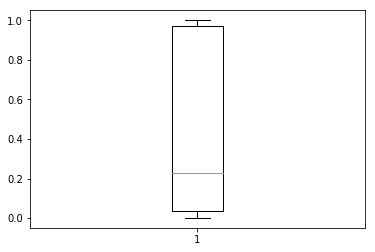

In [92]:
# Checking the Conversion Rate
plt.boxplot(y_train_pred_final.Converstion_prob)
plt.show()

In [93]:
y_train_pred_final.Converstion_prob.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    6463.000000
mean        0.384496
std         0.413275
min         0.000769
25%         0.037237
50%         0.228682
75%         0.968800
90%         0.996031
95%         0.996031
99%         0.998240
max         0.999993
Name: Converstion_prob, dtype: float64

In [100]:
#Training Set
y_train_pred_final['Rank'] = round(y_train_pred_final['Converstion_prob']*100,0)
y_train_pred_final.head()

,Converstion,Converstion_prob,predicted,Rank
0,0,0.070712,0,7.0
1,1,0.705554,1,71.0
2,1,0.998240,1,100.0
3,0,0.009327,0,1.0
4,1,0.968800,1,97.0


In [101]:
#Test Set
y_pred_final['Rank'] = round(y_pred_final['Conversion_prob']*100,0)
y_pred_final.head()

,Converted,Conversion_prob,final_predicted,Rank
0,0,0.009327,0,1.0
1,1,0.278267,0,28.0
2,1,0.228682,0,23.0
3,0,0.045533,0,5.0
4,1,0.064717,0,6.0
